In [1]:
'''

This code is part of the SIPN2 project focused on improving sub-seasonal to seasonal predictions of Arctic Sea Ice. 
If you use this code for a publication or presentation, please cite the reference in the README.md on the
main page (https://github.com/NicWayand/ESIO). 

Questions or comments should be addressed to nicway@uw.edu

Copyright (c) 2018 Nic Wayand

GNU General Public License v3.0


'''

'''
Plot forecast maps with all available models.
'''

%matplotlib inline
%load_ext autoreload
%autoreload
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
from collections import OrderedDict
import itertools
import numpy as np
import numpy.ma as ma
import pandas as pd
import struct
import os
import xarray as xr
import glob
import datetime
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import seaborn as sns
np.seterr(divide='ignore', invalid='ignore')
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import json
from esio import EsioData as ed
from esio import ice_plot
from esio import import_data
import subprocess
import dask
from dask.distributed import Client
import timeit

from esio import metrics
from esio import ice_plot

# General plotting settings
sns.set_style('whitegrid')
sns.set_context("talk", font_scale=.8, rc={"lines.linewidth": 2.5})

In [2]:
c = Client()
c

Client Scheduler: tcp://127.0.0.1:40359 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 16 Cores: 16 Memory: 67.47 GB


In [3]:
E = ed.EsioData.load()

In [4]:
# Load file
ds = xr.open_mfdataset(E.obs['NSIDC_0051']['sipn_nc']+'_yearly/*.nc', concat_dim='time', 
                       autoclose=True, parallel=True, chunks={'time':365})

In [5]:
print("Found times ",ds.time.values[0],"through",ds.time.values[-1])

Found times  1979-01-02T00:00:00.000000000 through 2017-02-28T00:00:00.000000000


In [6]:
# Define start and end years
ystart = '1980'
yend = '2010'

In [7]:
# Call function to get mean sip
ds_sip = metrics.calc_hist_sip(ds_sic=ds.sic, ystart=ystart, yend=yend, sic_threshold=0.15)

In [8]:
ds_sip.load();

In [9]:
# Save
ds_sip.name = 'sip'
ds_sip.to_netcdf(os.path.join(E.obs_dir,'NSIDC_0051','agg_nc','hist_SIP_'+ystart+'_'+yend+'.nc'))

/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/dask/utils.py:1010: UserWarning: Deprecated, see dask.base.get_scheduler instead
  warnings.warn("Deprecated, see dask.base.get_scheduler instead")


In [10]:
# Load in and test
ds_sip = xr.open_dataset(os.path.join(E.obs_dir,'NSIDC_0051','agg_nc','hist_SIP_'+ystart+'_'+yend+'.nc'))

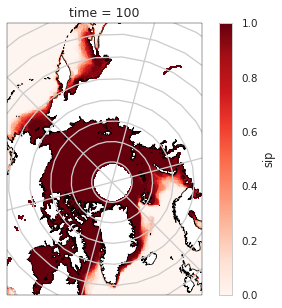

In [12]:
# Test plot
(f, axes) = ice_plot.polar_axis()
ds_sip.sip.sel(time=100).plot.pcolormesh(cmap='Reds',ax=axes, x='lon', y='lat',transform=ccrs.PlateCarree())

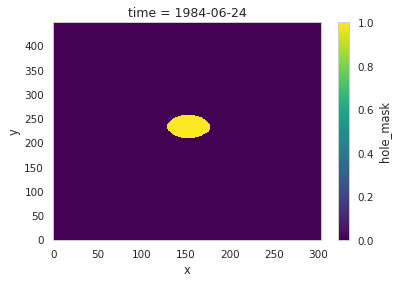

In [15]:
ds.hole_mask.isel(time=1000).plot()